**Importing the libraries**

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data into the program

In [19]:
cppred=pd.read_csv('car data.csv')
print(cppred.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [20]:
cppred.shape


(301, 9)

In [33]:
cppred.dropna()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Profit
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,-2.24
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,-4.79
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,-2.60
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,-1.30
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,-2.27
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,-2.10
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,-1.90
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,-7.65
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,-1.00


In [24]:
profit=cppred['Selling_Price']-cppred['Present_Price']
#Each amount in lakhs for selling as well as present or cost price
print(profit)

0     -2.24
1     -4.79
2     -2.60
3     -1.30
4     -2.27
       ... 
296   -2.10
297   -1.90
298   -7.65
299   -1.00
300   -0.60
Length: 301, dtype: float64


In [27]:
cppred['Profit']=profit
print(cppred.head())


  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Profit  
0       Dealer       Manual   -2.24  
1       Dealer       Manual   -4.79  
2       Dealer       Manual   -2.60  
3       Dealer       Manual   -1.30  
4       Dealer       Manual   -2.27  


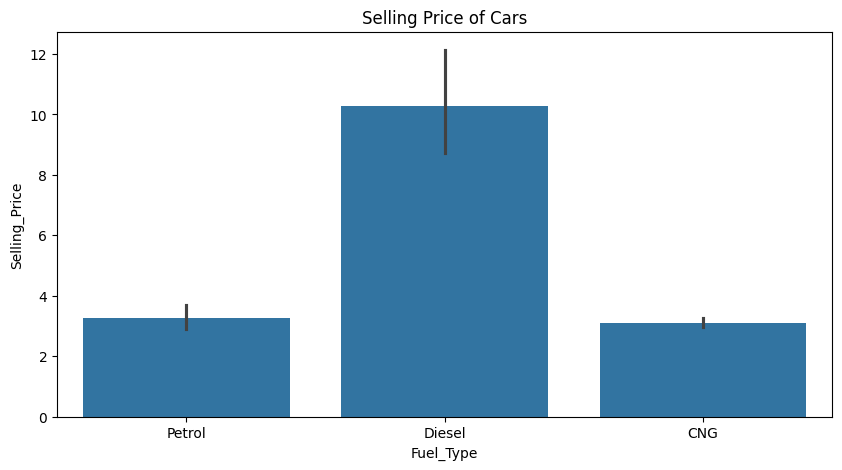

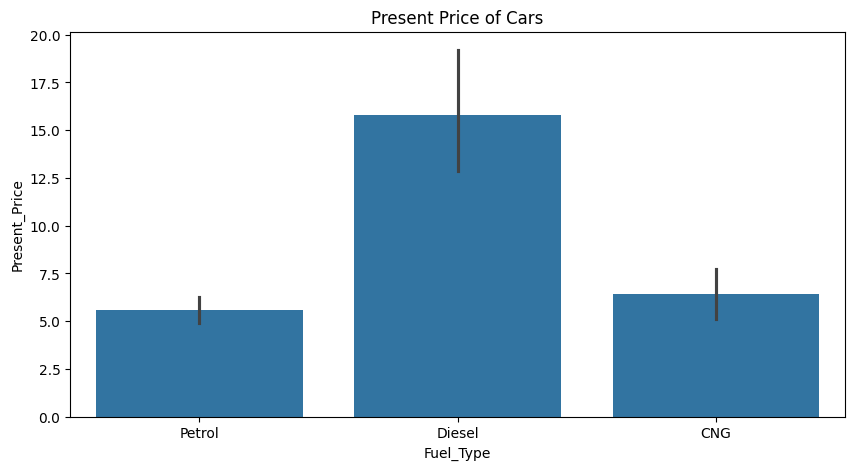

In [42]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'Fuel_Type', y = 'Selling_Price', data = cppred)
plt.title('Selling Price of Cars')
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x = 'Fuel_Type', y = 'Present_Price', data = cppred)
plt.title('Present Price of Cars')
plt.show()


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X = cppred[['Present_Price', 'Year']]
y = cppred['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Mean squared error: 4.015717643178563
Model coefficients: [0.51483036 0.44864568]


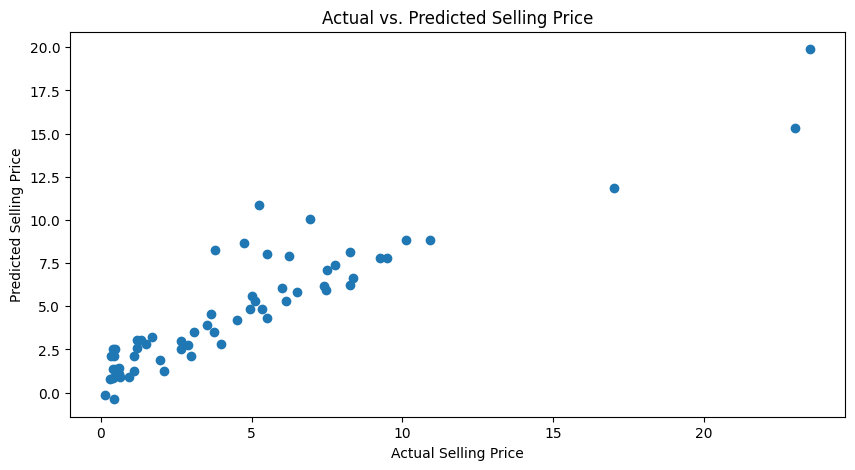

In [40]:

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

# Print the model coefficients
print("Model coefficients:", model.coef_)

# Plot the actual and predicted values
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Selling Price")
plt.show()

In [57]:
import plotly.express as px

fig = px.treemap(cppred, path=['Fuel_Type'],
                  values='Selling_Price',
                  color='Selling_Price',
                  color_continuous_scale='viridis',
                  title='Car Price Prediction Treemap')
fig.update_layout(height=600, width=1000)
fig.show()


Boxplot for car price prediction using selling price and transmission


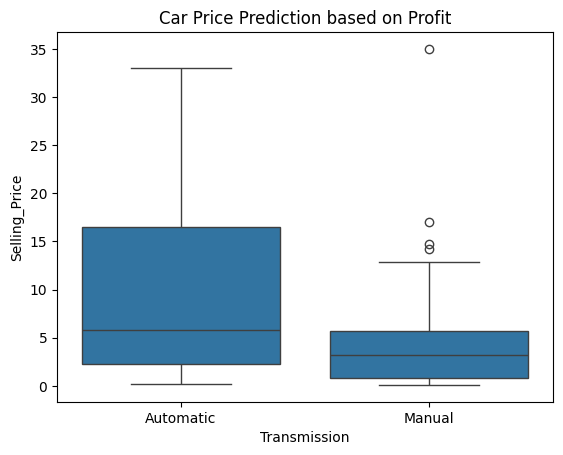

In [59]:

sns.boxplot(x = 'Transmission', y = 'Selling_Price', data = cppred)
plt.title('Car Price Prediction based on Profit')
plt.show()


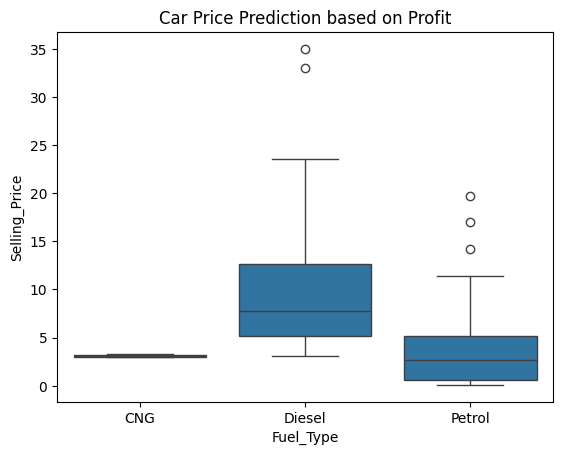

In [61]:
sns.boxplot(x = 'Fuel_Type', y = 'Selling_Price', data = cppred)
plt.title('Car Price Prediction based on Profit')
plt.show()


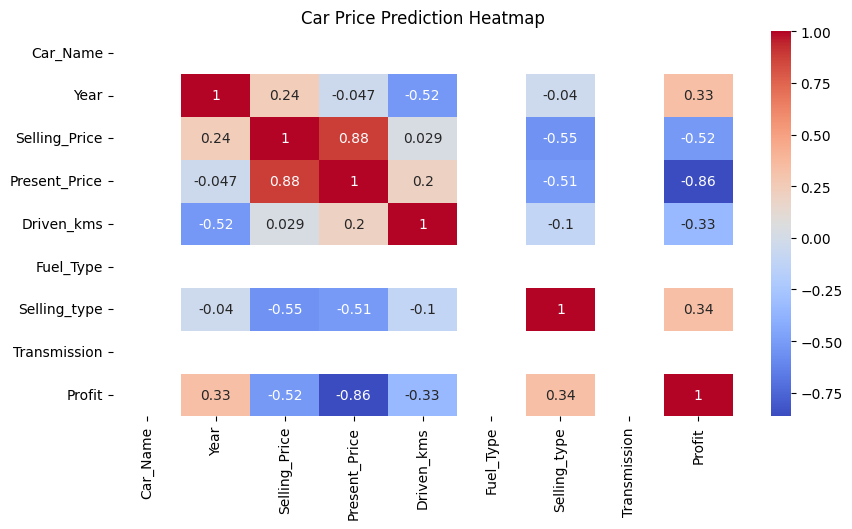

In [71]:
plt.figure(figsize=(10,5))
cppred['Transmission'] = [1 if x == 'Manual' else 0 for x in cppred['Transmission']]
cppred['Car_Name'] = [1 if x == 'Maruti' else 0 for x in cppred['Car_Name']]
cppred['Fuel_Type'] = [1 if x == 'Petrol' else 0 for x in cppred['Fuel_Type']]
cppred['Selling_type'] = [1 if x == 'Individual' else 0 for x in cppred['Selling_type']]
sns.heatmap(cppred.corr(), annot=True, cmap='coolwarm')
plt.title('Car Price Prediction Heatmap')
plt.show()
